# Binding Simulations

## Introduction

Assume that protein-ligand interactions are governed by the distribution of charge on their surface - there should be complementary charge distributions between the protein's active site and the ligand which it binds. 

We will attempt to determine the rate of a model enzymatic reaction at different temperatures, by calculating the binding energy at various positions of the ligand and the corresponding association and dissociation rates.

The ultimate goal would be to simulate an actual protein-ligand reaction and estimate the reaction rate. 

To get there, we'll start with a simple model and gradually add complexity -

- 1D strip of random charge distribution representing a protein and small line segment representing a ligand
- find binding energy at different positions. calc 'reaction rate' as fn of temperature.
- 1D strip, with 'conformation change' of ligand after binding, to cause faster dissociation
- 1D strip with 'induced fit' - active site changes conformation slightly during ligand binding

Once a 1D model is working, we'll advance to higher dimensions -

- 2D sheet, set up similarly
- 3D sphere, set up similarly
- 3D protein and ligand structures, with surface charge density estimations

Imports

In [65]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Simple 1d binding

First, we start with 1D strip of random charge distribution and small line segment of the same - the binding energy can be represented by the dot product of the charges at a particular position. 

In [66]:
# parameters
npoints = 100
ligandSize = 10

Define a 1d surface with random charge distribution

In [67]:
x = np.linspace(0,1,npoints)
surface = np.random.rand(npoints) * 2 - 1.0

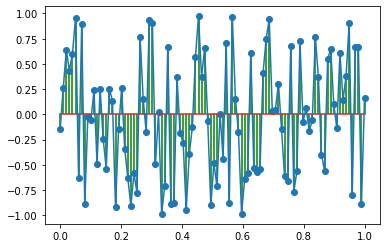

In [68]:
plt.stem(x, surface, 'g', use_line_collection=True)
plt.plot(x, surface);

Extract a portion from the midpoint to act as a ligand and reverse the charges

In [75]:
ligandPos = int(npoints/2 - ligandSize/2)
ligand = - surface[ligandPos : ligandPos + ligandSize]
ligandX = x[ligandPos : ligandPos + ligandSize]

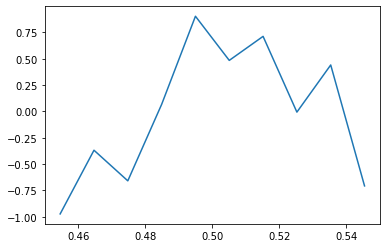

In [76]:
plt.plot(ligandX, ligand);

Make a simple binding energy function

In [71]:
def bindingEnergy(surface, ligand, pos):
    energy = np.dot(surface[pos: pos + len(ligand)], ligand)
    return energy

In [77]:
bindingEnergy(surface, ligand, 0)

-0.17133790077621514

Calculate binding energies of ligand at different points along the line

In [78]:
bindingEnergies = [bindingEnergy(surface, ligand, pos) for pos in range(0, npoints-ligandSize)]

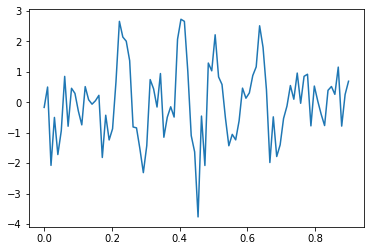

In [79]:
plt.plot(x[0:len(bindingEnergies)], bindingEnergies);

Note that the best binding energy is at the midpoint, as expected.